### About the Project

#### Context
This dataset is a playground for fundamental and technical analysis. It is said that 30% of traffic on stocks is already generated by machines, can trading be fully automated? If not, there is still a lot to learn from historical data.

#### Acknowledgements
Prices were fetched from Yahoo Finance, fundamentals are from Nasdaq Financials, extended by some fields from EDGAR SEC databases.

In this excercise, we are going to predict the 

#### Goal
Let us build a model based on GRU to predict the closing price of a stock, say of YAHOO.

### Impoting Modules
Let us begin by importing the modules.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

### Loading the data

Load the prices data from prices-split-adjusted.csv file.

In [ ]:
# df =  pd.read_csv('/content/prices-split-adjusted.csv', header=0)
df =  pd.read_csv('/content/prices-split-adjusted.csv', header=0)
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
print(df.shape)

(851264, 7)


## Filter the YAHOO data

Let us filter the data related YAHOO stocks and mojorly work on how to predict the closing prices of YAHOO


In [ ]:
df_yahoo = df[df['symbol']=='YHOO']

print(df_yahoo.shape)

df_yahoo.head(10)

(1762, 7)


,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0
3053,2010-01-11,YHOO,16.770000,16.740000,16.480000,16.830000,16181900.0
3521,2010-01-12,YHOO,16.650000,16.680000,16.600000,16.860001,15672400.0
3989,2010-01-13,YHOO,16.879999,16.900000,16.650000,16.980000,16955600.0
4457,2010-01-14,YHOO,16.809999,17.120001,16.799999,17.230000,16715600.0
4925,2010-01-15,YHOO,17.250000,16.820000,16.750000,17.250000,18415000.0


## Explore the YAHOO data

Let us explore the data. 

* Let us use `describe()` to view statistical-details about the data.

* Also, let us see if there are any null values in each column of the data using `isnull().sum()`.

**Note**:

* `describe()` is a method used on a data frame to view the statistical description of the numerical columns in the data frame.

*  `isnull()` method returns True in the places where there are null values(or missing values) and False if the values are not nulls. 

* `isnull().sum()` displays column-wise information about the number of nulls found in each column of the data frame.

In [ ]:
df_yahoo.describe()


,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,27.297917,27.291992,26.975602,27.609977,1.996907e+07
std,11.412612,11.406846,11.289736,11.526101,1.376851e+07
min,11.300000,11.090000,11.090000,11.800000,2.586900e+06
25%,15.950000,15.920000,15.770000,16.110001,1.235152e+07
50%,26.770001,26.750000,26.495000,27.105001,1.639070e+07
75%,37.335000,37.377501,36.897501,37.689999,2.325988e+07
max,52.279999,52.369999,51.639999,52.619999,2.338721e+08


In [ ]:
df_yahoo.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

We see that there are no missing values in the YAHOO dataset, which apparently indicates a good state of our data.

## Setting the Index for the Data Frame
Since we are dealing with time-series data, it makes sense to see the date column as the index of our data frame.

 We shall do this by using the `set_index` method on the `df_yahoo` data frame.

 But before that, let us first convert the "date" column into DateTime type using the `pd.to_datetime()` method of pandas.

**Note**:

* `pd.to_datetime()` is used to covert the type of column to datetime type. 

* `set_index()` method is used to set the data frame index using existing columns.

In [ ]:
df_yahoo['date']= pd.to_datetime(df_yahoo['date'])
df_yahoo.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


date      datetime64[ns]
symbol            object
open             float64
close            float64
low              float64
high             float64
volume           float64
dtype: object

Observe the type of the column was previously “object”, whereas it is of type “datetime64[ns]”.

In [ ]:
df_yahoo = df_yahoo.set_index("date")
print(df_yahoo.shape)
df_yahoo.head(10)

(1762, 6)


,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0
2010-01-11,YHOO,16.770000,16.740000,16.480000,16.830000,16181900.0
2010-01-12,YHOO,16.650000,16.680000,16.600000,16.860001,15672400.0
2010-01-13,YHOO,16.879999,16.900000,16.650000,16.980000,16955600.0
2010-01-14,YHOO,16.809999,17.120001,16.799999,17.230000,16715600.0


## Set the frequency of time-series to Business days

It is very important for a time series to have a frequency set, so as to consolidate that the data we are working on is free of any missing data.

Since we are working with stock-exchange time-series data, it makes sense to set the frequency of the time-series to business days, meaning the data is recorded for weekdays but not any weekends. 

Thanks to pandas, there is a readily available method `asfreq()` to set the frequency for the time-series.

**Note**:

`asfreq()` method converts the time-series to specified frequency.

We could pass an argument to the method to denote frequency. For example, `df.asfreq('d')` implies to set the data to a daily frequency. Similarly, 

*  'b' means business days

* '30S' means 30 seconds

and so on.

In [ ]:
print(df_yahoo.shape)

yahoo_data = df_yahoo.asfreq('b')
print(yahoo_data.shape)

yahoo_data.isnull().sum()

(1762, 6)
(1825, 6)


symbol    63
open      63
close     63
low       63
high      63
volume    63
dtype: int64

In [ ]:
yahoo_data.tail(30)

,symbol,open,close,low,high,volume
date,,,,,,
2016-11-21,YHOO,41.439999,41.110001,40.939999,41.480000,11338000.0
2016-11-22,YHOO,41.200001,41.009998,40.830002,41.400002,8881200.0
2016-11-23,YHOO,40.910000,40.959999,40.549999,40.980000,3634900.0
2016-11-24,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-25,YHOO,41.080002,40.869999,40.709999,41.080002,2586900.0
2016-11-28,YHOO,40.849998,41.450001,40.740002,41.700001,6765800.0
2016-11-29,YHOO,41.430000,41.599998,41.119999,41.830002,7246100.0
2016-11-30,YHOO,41.619999,41.020000,40.880001,41.669998,7624500.0
2016-12-01,YHOO,41.000000,39.630001,39.529999,41.040001,12614600.0


Observe that there are extra rows and some missing values after setting the frequency to business days.

## Getting the Dates of Missing Values

Let us see if the missing values are due to the official holidays of NYSE or due to some other unknown factors. 

In case the dates are of official holidays, then those values can't be accounted for as missing. Else, we have to come up with ways to fill those missing values. 

So first, let us first filter the null rows and get the dates of these missing values.

**Note**:

`any()` returns whether any element is True, potentially over an axis. 

`isnull().any(axis=1)` returns a dataframe which contains null values along the rows.

`df.index` gets the indices of the data frame.

`df.index.tolist()` returns the list representation of the indexes of the data frame.

In [ ]:
null_data = yahoo_data[yahoo_data.isnull().any(axis=1)]

null_data.head()


,symbol,open,close,low,high,volume
date,,,,,,
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-15,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-05,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
null_dates = null_data.index.tolist()
# null_dates

## Filtering out the Holidays

Let us check if the dates of missing values fall in any holidays official for NYSE. A quick check at the NYSE official website would help us know the list of [official holidays of NYSE][1].


Now that we know the list of official holidays for NYSE, we use the `calendar` module and `datetime` module to check if a given date in the `null_dates` list is a holiday or not. We do this by:

*  Determining if that week or day name of the date in that month is a holiday or not. For example, Washington's Birthday is celebrated on the third Monday of February. 
*  So we extract the week, day, month, year from a given date in `null_dates`, and check if the day falls between 15 and 21(the possible day range of third Monday) and if the week is Monday. 
* If yes, then it is a holiday. Then we append that date in the `holidays` list. We took a list of the dates when Good Friday occurs since there is no particular way to determine it.
*  Finally, after obtaining the entire list of `holidays`, we filter out the holidays dates from `null_dates` and store the non-holiday dates in the list `non_holidays`.


  [1]: https://www.nyse.com/markets/hours-calendars

In [ ]:
# https://en.wikipedia.org/wiki/Federal_holidays_in_the_United_States#List_of_federal_holidays
# Federal holidays in USA: https://www.calendar-365.com/holidays/2011.html
# New Year's Day, Independence Day, Thanksgiving Day, Christmas Day,
# https://www.nyse.com/markets/hours-calendars
# http://www.market-holidays.com/

import calendar
import datetime

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [ datetime.date(2010,4,2), datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
print(non_holidays)

[Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00')]


We observe that the values are missing for October 29th and 30th of 2012.



## Getting the Modified Data

Let us remove the rows that belong to the holidays using the `drop()` method on the `yahoo_data` data frame.

**Note**:

`drop()` metod is used to drop specified labels from rows or columns.

In [ ]:
print(yahoo_data.shape)

modified_df = yahoo_data.drop(holidays)
modified_df.shape

(1825, 6)


(1764, 6)

## Filling the Missing Values

Now that we know that there are two missing values in the data, we have to fill those missing values. 

**Note**:

Pandas provides some built-in methods to do this job.

*  `bfill` - used to backward fill or use the next valid observation to fill the missing values in the dataset.
*  `ffill`  - used to forward fill or use the previous valid observation to fill the missing values in the dataset.
*  using `fillna(metohd='bfill')` is another way of achieving the job using backward filling. Similarly, one could use `ffill` or any other way like `mean()`.

Let us use `bfill()` to fill the two missing values.

In [ ]:
print("Before filling missing values:\n",modified_df.isna().sum())

modified_df = modified_df.bfill(axis ='rows')

print("\nAfter filling missing values:\n",modified_df.isna().sum())

Before filling missing values:
 symbol    2
open      2
close     2
low       2
high      2
volume    2
dtype: int64

After filling missing values:
 symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


## Visualizing YAHOO Data

Now, let us have a look at how the closing values of YAHOO data look like. 

Below defined is the `plotter` function which extracts the `close` values, reshapes the data into columnar data, and uses that to plots the data.

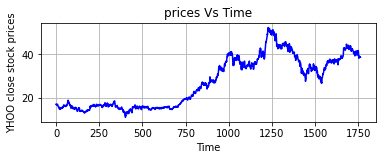

In [ ]:
def plotter(code):
    global closing_stock
    plt.subplot(211)
    company_close = modified_df[modified_df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

plotter("YHOO")

## Feature Scaling

Let us have a look at the minimum and maximum values of the closing prices using `min()` and `max()` respectively. 

Let us then use `MinMaxScaler`, a module from sklearn library to scale the values into the range of 0 and 1.

In [ ]:
print(closing_stock.min())
print(closing_stock.max())

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

stocks = scaler.fit_transform(closing_stock)

print(stocks.min())
print(stocks.max())

11.09
52.37
0.0
0.99999994


## Splitting the Data

Let us split the `stocks` into 3 parts, for training, validation, and testing purposes.

Let us have 80% of the data in the train set, 10% in the validation set and the remaining 10% in the test set.

In [ ]:
n_train = int(len(stocks) * 0.80)
n_remaining = len(stocks) - n_train

n_val = int(n_remaining*0.50)
n_test = n_remaining - n_val 
print("Train samples:",n_train, "Validation Samples:",n_val,"Test Samples:", n_test)

train = stocks[0:n_train]
print(train.shape)

val = stocks[n_train:n_train + n_val]
print(val.shape)

test = stocks[n_train + n_val:]
print(test.shape)

Train samples: 1411 Validation Samples: 176 Test Samples: 177
(1411, 1)
(176, 1)
(177, 1)


## Creating the Dataset

In this exercise, we are going to use GRU, which is one of the quite useful deep learning algorithms to deal with time-series data.

It expects the input data to be three-dimensional. The first dimension indicates the batch size, the second dimension is the timestamps and the third dimension is the number of features.

Let us feed 2 values to predict the next value. To create the data set, let us define the `create_dataset` function.

In the function, we will be traversing till the last third row of the dataset, combine every two consecutive values as one input, and put the third value as the value to be predicted(ground truth of prediction).

In [ ]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

n_features = 2

trainX, trainY = create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
valX = valX.reshape(valX.shape[0] , 1 ,valX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 2) (1408,) (173, 2) (173,) (174, 2) (174,)
(1408, 1, 2) (1408,) (173, 1, 2) (173,) (174, 1, 2) (174,)


## Building the Model

Finally, we have reached the modeling part.

As discussed previously, we shall use a GRU based model. 

* Firstly, let us import the necessary TensorFlow and Scikit-Learn libraries.

* Next, we shall build the model by adding layers, compiling it, and then fitting the model on the train data.

A bit about the model we are going to build:

* The model we are going to use is a stacked GRU. 
* So the output of one GRU layer should act as the input to the next GRU layer stacked above the former one and so on. 
* We have already discussed that the GRU/LSTM layers in Keras expect the input to be in three-dimensional. 
* Thus, we have to make sure that the output from a previous layer is formatted in a three-dimensional way so as to provide it as input to the next layer. 
* This job could be achieved by setting `return_sequences=True` in the GRU layers whose output would potentially act as the input to the next GRU layer.


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [ ]:
model = keras.Sequential()

In [ ]:
# First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

# The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

Observe the argument `return_sequences`, which is set to be `True` only for those layers which have a GRU layer after them(that is, the first and second GRU layers), unlike the third layer.
This is so because the output of the third layer would be fed to a Dense layer but not a GRU/LSTM layer.

In [ ]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

Let us now see the summary of the model architecture.

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 100)            31200     
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 150)            113400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               75600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [ ]:
history = model.fit(trainX,trainY,epochs=100,batch_size=128, verbose=1, validation_data = (valX,valY))

Epoch 1/100
11/11 [==============================] - 1s 74ms/step - loss: 0.1341 - mean_squared_error: 0.1341 - val_loss: 0.0953 - val_mean_squared_error: 0.0953
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 7.2538e-04 - val_mean_squared_error: 7.2538e-04
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 4.9767e-04 - val_mean_squared_error: 4.9767e-04
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 9.8299e-04 - val_mean_squared_error: 9.8299e-04
Epoch 7/1

## Evaluating the Model Performance

Let us now compute the model score on train data, validation data, and test data. 

We shall use the `model.evaluate()` and print the Mean Squared Error and Root Mean Squared Error for each of the train, validation and test sets.

In [ ]:
import math

def model_score(model, X_train, y_train, X_val, y_val , X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))

    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (val_score[0], math.sqrt(val_score[0])))

    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (test_score[0], math.sqrt(test_score[0])))


model_score(model, trainX, trainY ,valX, valY , testX, testY)

Train Score:
MSE: 0.00018 , RMSE: 0.01
Validation Score:
MSE: 0.00037 , RMSE: 0.02
Test Score:
MSE: 0.00023 , RMSE: 0.02


## Visualizing Loss vs Epochs

Now that we have built the model, let us visualize how the model loss varies with respect to the epoch for the train data and validation data using matplotlib.



*  Firstly, let us have a look at the `history`, where all the history about various parameters like loss, mean_squared_error, and validation mean_squared_error are stored when the model was fit on train data and validated on validation data.

*  Since we aim to plot the training loss an validation loss behavior with respect to the number of epochs, let us use those corresponding values from `history.history` dictionary.

 `loss`  represents the training loss and `val_loss` indicates the validation loss.

 Let us plot the training loss and validation loss. We shall also set the title, ylabel, xlabel, and legend for the plot and finally show it.


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


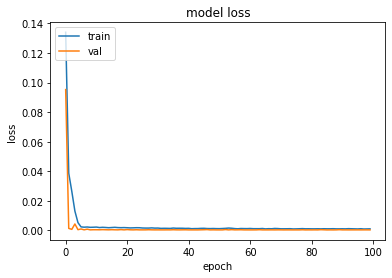

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Visualizing Predictions vs Ground Truths

Let us now plot the predicted stock prices vs the actual ground truth values. 

We shall use `model.predict()` to get the predicted values of the test data set.



* Since we have scaled the actual values of the dataset, we need to inverse transform the values. So, inverse transform the predicted values using `scaler.inverse_transform()` and pass the `pred` as an argument.


[[37.65253 ]
 [37.428337]
 [37.271576]
 [37.128395]
 [36.84003 ]
 [36.735134]
 [36.691746]
 [36.32445 ]
 [36.156303]
 [36.777985]]
[[37.23]
 [37.11]
 [36.95]
 [36.59]
 [36.6 ]
 [36.53]
 [36.01]
 [36.  ]
 [36.94]
 [37.23]]


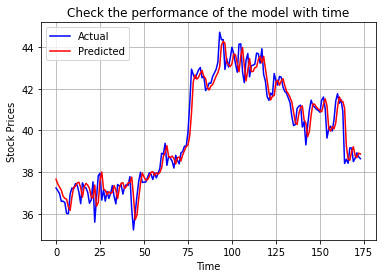

In [ ]:
pred = model.predict(testX)
pred = scaler.inverse_transform(pred)
print(pred[:10])

testY_actual = testY.reshape(testY.shape[0] , 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

plt.plot(testY_actual , 'b')
plt.plot(pred , 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()